In [38]:
import pandas as pd
import numpy as np
from sklearn import *

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [4]:
target = "default"
y = np.where(df[target] == 2, 1, 0)
y

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [7]:
pd.Series(y).value_counts()/len(y)

0    0.7
1    0.3
dtype: float64

accuracy 0.7566666666666667 
precision 0.6 
recall 0.45348837209302323


(<matplotlib.figure.Figure at 0x1a1eb0b630>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1eb883c8>)

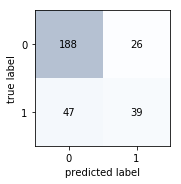

In [21]:
target = "default"
y = np.where(df[target] == 2, 1, 0)
X = df.copy() # features ... label is not included
del X[target]
X = pd.get_dummies(X, drop_first=True) # handle catergorical variables ... one hot encoding

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                            , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=5, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])
                                      
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("accuracy", metrics.accuracy_score(y_test, y_test_pred),
"\nprecision", metrics.precision_score(y_test, y_test_pred),
"\nrecall", metrics.recall_score(y_test, y_test_pred))
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

In [26]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]

In [27]:
y_test_prob

array([0.39057174, 0.93703644, 0.20657021, 0.61518513, 0.84263414,
       0.64645627, 0.4494791 , 0.2594988 , 0.07077182, 0.213155  ,
       0.82216781, 0.47922995, 0.10628614, 0.04927787, 0.37051886,
       0.40154836, 0.02384756, 0.08634611, 0.03673578, 0.8716225 ,
       0.17347053, 0.68418377, 0.08289624, 0.08335264, 0.20201892,
       0.14277761, 0.11199784, 0.22723868, 0.08939474, 0.8914261 ,
       0.3687219 , 0.03176349, 0.45735348, 0.21773117, 0.30430631,
       0.92027889, 0.24340843, 0.4961519 , 0.1303132 , 0.0819819 ,
       0.09401154, 0.58658622, 0.009761  , 0.49218681, 0.04921602,
       0.03568655, 0.10812248, 0.27239898, 0.0533497 , 0.10149276,
       0.22215534, 0.45281983, 0.59676824, 0.51534091, 0.22166303,
       0.1454495 , 0.58814834, 0.65672602, 0.02847046, 0.59138439,
       0.43687783, 0.07374869, 0.52003891, 0.01800186, 0.56258666,
       0.25013105, 0.18103621, 0.05744698, 0.8604261 , 0.93227089,
       0.16641523, 0.22303058, 0.03080095, 0.59138775, 0.14556

accuracy 0.7466666666666667 
precision 0.75 
recall 0.1744186046511628


(<matplotlib.figure.Figure at 0x1a1f7bb668>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1f50c128>)

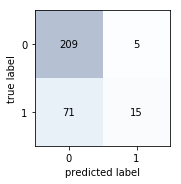

In [50]:
y_test_pred = np.where(y_test_prob > 0.8, 1, 0)
print("accuracy", metrics.accuracy_score(y_test, y_test_pred),
"\nprecision", metrics.precision_score(y_test, y_test_pred),
"\nrecall", metrics.recall_score(y_test, y_test_pred))
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))



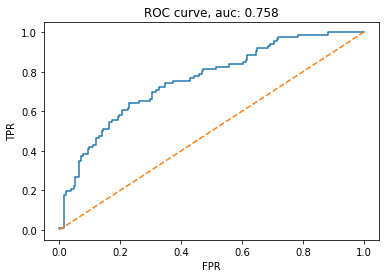

In [51]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve, auc: %.3f" % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], ls = "--")


In [43]:
pd.DataFrame({"fpr": fpr, "tpr": tpr, "threshold": threshold})

,fpr,threshold,tpr
0,0.000000,0.961698,0.011628
1,0.014019,0.930588,0.011628
2,0.014019,0.822168,0.174419
3,0.023364,0.805632,0.174419
4,0.023364,0.764420,0.197674
5,0.037383,0.742418,0.197674
6,0.037383,0.728124,0.209302
7,0.046729,0.717631,0.209302
8,0.046729,0.707083,0.220930
9,0.051402,0.699555,0.220930


In [47]:
pd.Series(y_train).value_counts()/len(y_train)

0    0.694286
1    0.305714
dtype: float64

In [48]:
pd.Series(y_test).value_counts()/len(y_test)

0    0.713333
1    0.286667
dtype: float64